### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Look at number of rows/columns, summary statistics and data types (total counts of numberical/categorical)
print("The data has {} rows and {} columns".format(data.shape[0], data.shape[1]))
display(data.describe())
display(data.dtypes.value_counts())

The data has 12684 rows and 26 columns


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


object    18
int64      8
dtype: int64

#### There are 18 categorical and 8 numerical data

In [5]:
# Separating numerical and categorical variables
category_vars = data.columns[data.dtypes == 'object']
numeric_vars = data.columns[data.dtypes != 'object']

print(category_vars)
print(numeric_vars)

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [6]:
# Get % on missing values in each column of the numerical  
data[numeric_vars].isnull().sum().sort_values(ascending=False)/len(data)

temperature          0.0
has_children         0.0
toCoupon_GEQ5min     0.0
toCoupon_GEQ15min    0.0
toCoupon_GEQ25min    0.0
direction_same       0.0
direction_opp        0.0
Y                    0.0
dtype: float64

In [7]:
# Get counts on missing values in each column of the categorical data
data[category_vars].isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
passanger                   0
income                      0
occupation                  0
destination                 0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
weather                     0
education                   0
dtype: int64

In [8]:
# Number of original data who accepted/not accepted coupons
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [9]:
# Get % of missing values in the categorical data
data[category_vars].isnull().sum().sort_values(ascending=False)/len(data)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
passanger               0.000000
income                  0.000000
occupation              0.000000
destination             0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
weather                 0.000000
education               0.000000
dtype: float64

In [10]:
# Total number of missing data by column
data[category_vars].isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
passanger                   0
income                      0
occupation                  0
destination                 0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
weather                     0
education                   0
dtype: int64

### Check categorical data contents of columns with missing data and decide approach to cleaning

In [11]:
# Examine the categories in column car that has data
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

#### ***Column car does not affect how we are solving the business problem. Ok to delete the column in cleaning stage and create a new df.

In [12]:
# Explore missing data on CoffeeHouse: Number of times 
coffeehouse_missing = data[data['CoffeeHouse'].isnull() == True]
coffeehouse_missing

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


#### ***Missing data on "CoffeeHouse" column is 1.7% of total data and not significant number. Ok to remove in cleaning stage.

In [13]:
rest20To50_missing = data[data['Restaurant20To50'].isnull() == True]
rest20To50_missing

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,0,1,1
12301,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,1,0,1
12302,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,0,0,1,0
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,1,0,1,0


#### ***Missing data on "Restaurant20To50" column represents 1.5% of the entire dataset and this group has more missing data in other fields like "RestaurantLessThan20", "CoffeeHouse", and "CarryAway". Therefore, ok to drop these records in cleaning stage

In [14]:
carryaway_missing = data[data['CarryAway'].isnull() == True]
carryaway_missing

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,0,0,1,0,1
8645,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8646,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8647,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0


#### ***Missing data on "CarryAway" column represents 1.2% of the entire data. Ok to delete in cleaning stage

In [15]:
rest_lt20_missing = data[data['RestaurantLessThan20'].isnull() == True]
rest_lt20_missing

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,Work,Alone,Sunny,30,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,0
8974,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,1
8975,Work,Alone,Sunny,80,7AM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,0,0,1,0,1
8976,Work,Alone,Rainy,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,1,0,1,1


#### ***Missing data on "RestaurantLessThan20" column represents 1.0% of the entire dataset and this group has more missing data in other fields like "Restaurant20To50", "CoffeeHouse", and "CarryAway". Therefore, ok to drop these records in cleaning stage.

In [16]:
bar_missing = data[data['Bar'].isnull() == True]
bar_missing

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,1,1,0,1,0


#### ***Missing data on "Bar" column represents 0.8% of the entire dataset, which is very insignificant.Additionaly, this group has more missing data in other fields like "RestaurantLessThan20", "CoffeeHouse", and "CarryAway". Therefore, ok to drop these records in cleaning stage

3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
# Create a new df without the "car" column
new_df = data.drop("car", axis=1)
new_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [18]:
# Confirm car column was deleted; Result should be 25 columns
print(new_df.shape)
new_df.columns

(12684, 25)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [19]:
# Execute the dropping of all missing data as noted above with ***
final_df = new_df.dropna()
final_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [20]:
print("The final data has {} rows and {} columns".format(final_df.shape[0], final_df.shape[1]))
display(final_df.dtypes.value_counts())

The final data has 12079 rows and 25 columns


object    17
int64      8
dtype: int64

#### Final dataset total count was better than what was expected. Originally, we could have expected the final count to be approximately 11,890 [12,684-794(total count of missing)] assuming there are no overlaps with the missing data. However, due to the overlaps in missing data across columns, there were fewer records dropped and the resulting count was much higher than expected, which is better because we have preserved more data.

In [21]:
# Confirmation no more missing data in the final data
final_df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [22]:
# Get proportions of coupon acceptance (Y=1: accepted, Y=0: not accepted)
coupon_acceptance = final_df['Y'].value_counts()
coupon_acceptance

1    6877
0    5202
Name: Y, dtype: int64

In [23]:
# Proportion of user accepting the coupon
accepted = coupon_acceptance[1]/len(final_df)
accepted

0.5693352098683666

#### There are 57% customers who chose to accept coupons and 43% customers who did not accept coupons

In [30]:
unique_acceptrate = final_df['Y'].value_counts()
unique_acceptrate

1    6877
0    5202
Name: Y, dtype: int64

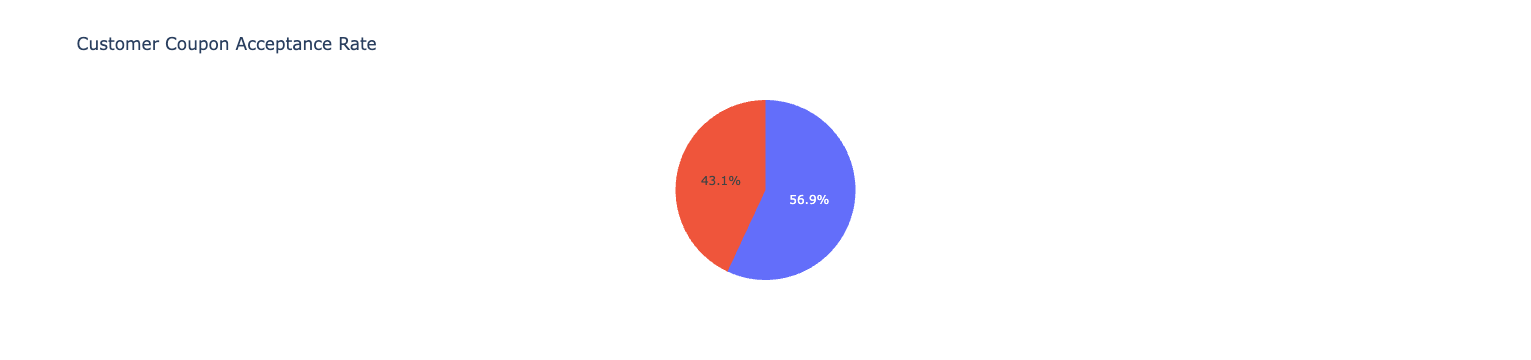

In [38]:
px.pie(final_df, values=unique_acceptrate, title= 'Customer Coupon Acceptance Rate')

5. Use a bar plot to visualize the `coupon` column.

In [39]:
final_df['coupon'].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

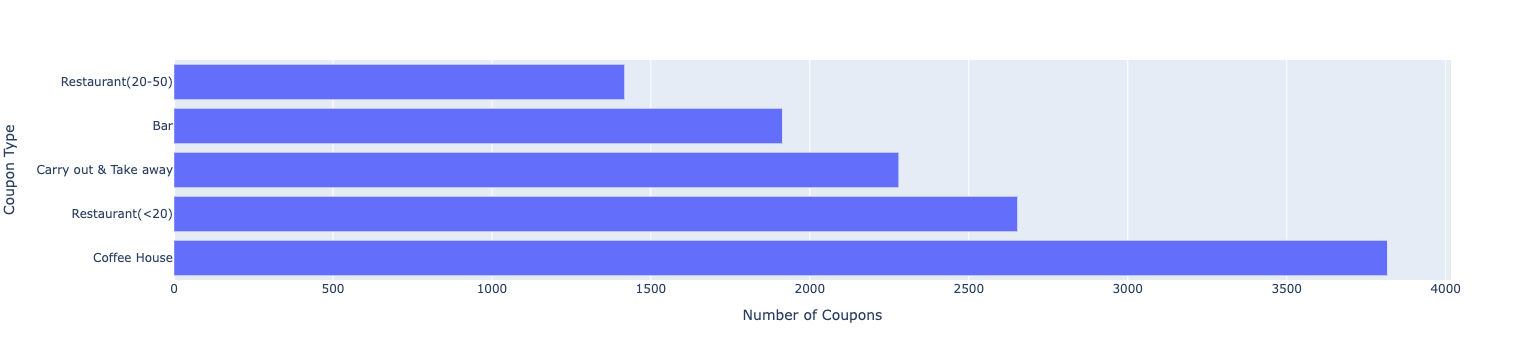

In [41]:
# shows the total number of coupons by type of coupon
px.bar(final_df['coupon'].value_counts(), labels={'index':'Coupon Type', 'coupon': 'Number of Coupons'}, x="coupon")


6. Use a histogram to visualize the temperature column.

In [42]:
final_df["temperature"].value_counts()

80    6222
55    3662
30    2195
Name: temperature, dtype: int64

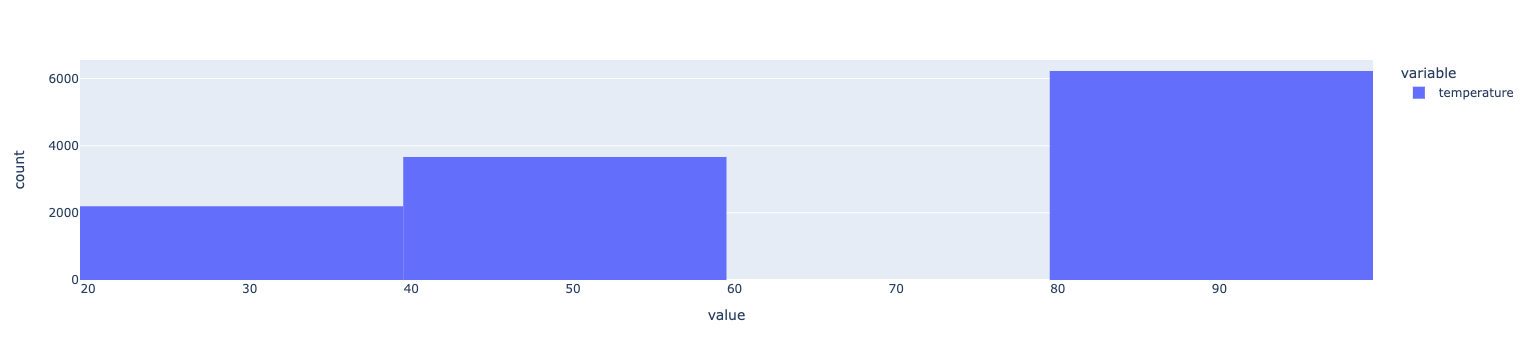

In [43]:
px.histogram(final_df["temperature"])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
# Select data with customers getting Bar coupons
Bar = final_df.query('coupon=="Bar"')
Bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [29]:
# Total Bar coupons given out to a customer
Bar.shape[0]

1913

In [30]:
# Accepted Bar coupons
Bar_accepted = final_df[(final_df['coupon'] == 'Bar') & (final_df['Y'] == 1)]
Bar_accepted

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [31]:
Bar_accepted.shape[0]

788

2. What proportion of bar coupons were accepted?


In [32]:
# Percent of Bar coupons accepted
pct_bar_coupons_accepted = Bar_accepted.shape[0]/Bar.shape[0]
pct_bar_coupons_accepted

0.41191845269210664

#### 41% of Bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [33]:
# Among the customers who have accepted the bar coupons, these categories represent the frequency of a customer goes to a Bar 
# i.e. there are 33 customers who accepted the Bar coupon who goes to the bar more than 8 times in a month
Bar_accepted['Bar'].value_counts()

less1    247
1~3      245
never    149
4~8      114
gt8       33
Name: Bar, dtype: int64

In [34]:
# Total number of customers who visited the bar more than 3 times
morethan3_bar_visits = Bar_accepted["Bar"].value_counts()["4~8"] + Bar_accepted["Bar"].value_counts()["gt8"]
morethan3_bar_visits

147

In [37]:
# Total number of customers who visited the bar <= 3 times
freq = ['never', 'less1', '1~3']

fewer_bar_visits = Bar_accepted.query('Bar in @freq')
fewer_bar_visits

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [39]:
# acceptance rate of those who went to a bar 3 or fewer times a month
fewerBar_AR = fewer_bar_visits.shape[0] / Bar_accepted.shape[0]
fewerBar_AR

0.8134517766497462

In [40]:
# acceptance rate for customers who have visited the bar more than 3 times
pct_gt8_barvisits = 1 - fewerBar_AR
pct_gt8_barvisits

0.18654822335025378

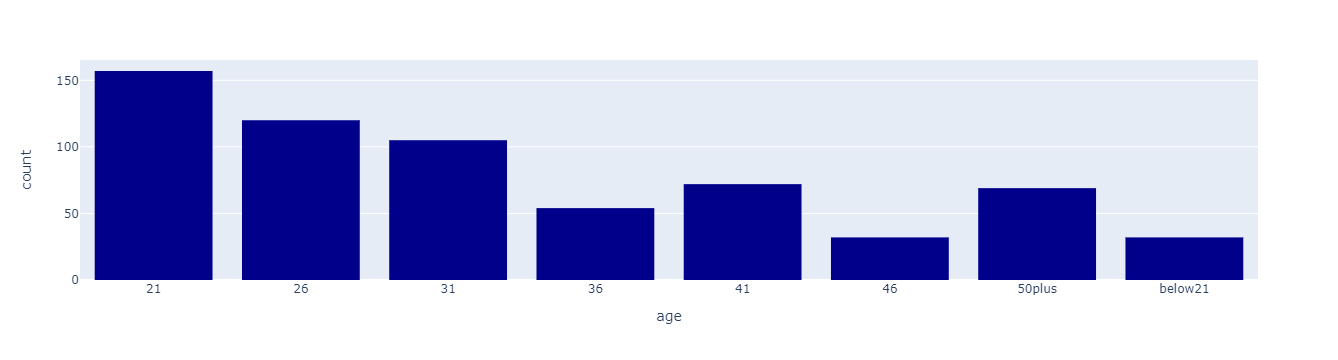

In [41]:
# Visual to show which ages does bar coupons appeal to
px.histogram(fewer_bar_visits['age'].sort_values(), x='age', color_discrete_sequence=['darkblue'])

#### Acceptance rate of those who went to bar fewer than 3 times a month is about 81% compared to 19% who went more than 3 times per month. In this group, bar coupons appeal to ages 21 to early 30s.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [42]:
Indexed_Bar_accepted = Bar_accepted.set_index('Bar')
Indexed_Bar_accepted

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
Bar,,,,,,,,,,,,,,,,,,,,,
never,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
never,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
never,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
less1,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
less1,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
never,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
never,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
never,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1


In [43]:
Indexed_Bar_accepted.shape[0]

788

In [44]:
# Total number of drivers who go to a bar more than once a month and all ages
barAccepted_gt1_allages = Indexed_Bar_accepted.loc[['1~3', '4~8', 'gt8'], ['age']].value_counts()
barAccepted_gt1_allages

age    
26         122
21         110
31          61
50plus      42
41          21
36          20
46          12
below21      4
dtype: int64

In [45]:
# Total number of drivers who go to a bar more than once a month and ages over 25
barAccepted_gt1_over25 = barAccepted_gt1_allages[0:7].sum()
barAccepted_gt1_over25

388

In [46]:
# Percentage of drivers who go to a bar more than once a month and ages over 25
pct_gt1_over25 = barAccepted_gt1_over25 / Indexed_Bar_accepted.shape[0]
pct_gt1_over25

0.49238578680203043

In [47]:
allothers_pct = 1-pct_gt1_over25
allothers_pct

0.5076142131979695

#### Acceptance rate of drivers who go to a bar more than once a month and ages over 25 is approximately 49% and all others are 51% as well.

#### --- Problem 5 and 6 not covered in class yet ---

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [48]:
# Drivers who go to bars gt once a month and had no kid passenger
groups = ['1~3', '4~8', 'gt8']
passengers = ['Alone', 'Friend(s)', 'Partner']

Bar_gt1mo_noKids = Bar_accepted.query("Bar in @groups and passanger in @passengers")
Bar_gt1mo_noKids

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [49]:
Bar_gt1mo_noKids.shape[0]

376

In [50]:
# Check if there are occupations in farming, fishing, or forestry. There is none. Therefore, Bar_gt1mo_noKids is the df for #7
Bar_gt1mo_noKids['occupation'].value_counts()

Unemployed                                   57
Student                                      43
Sales & Related                              42
Management                                   35
Office & Administrative Support              30
Computer & Mathematical                      27
Arts Design Entertainment Sports & Media     17
Business & Financial                         15
Protective Service                           12
Food Preparation & Serving Related           11
Healthcare Practitioners & Technical         11
Legal                                        10
Healthcare Support                           10
Education&Training&Library                    8
Production Occupations                        8
Transportation & Material Moving              7
Architecture & Engineering                    6
Construction & Extraction                     6
Personal Care & Service                       6
Installation Maintenance & Repair             5
Community & Social Services             

In [51]:
# Look what ages are customers in this group
Bar_gt1mo_noKids['age'].value_counts()

26         117
21         108
31          60
50plus      38
41          20
36          17
46          12
below21      4
Name: age, dtype: int64

In [52]:
# Percent of Drivers who go to bars gt once a month and had no kid passenger and not working in farm, forest or fishing
pct_Bar_gt1mo_noKids = Bar_gt1mo_noKids.shape[0] / Bar_accepted.shape[0]
pct_Bar_gt1mo_noKids

0.47715736040609136

#### Acceptance rate of drivers who go to bars more than once a month, had no kid passenger and not working in farm, fishing or forest is  48%

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [53]:
# Check if Bar_gt1mo_noKids df have any widowed marital status; Since no widowed in this group, use this df
Bar_gt1mo_noKids['maritalStatus'].value_counts()

Single               199
Married partner       93
Unmarried partner     73
Divorced              11
Name: maritalStatus, dtype: int64

#### Acceptance rate for passengers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is the same as above, 48%!


In [54]:
# The number of passengers who go to bars more than once a month and are under age 30
under30 = ['21', '26', 'below21']
groups = ['1~3', '4~8', 'gt8']

Bar_gt1mo_age30 = Bar_accepted.query('Bar in @groups and age in @under30')
Bar_gt1mo_age30

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [55]:
# Percent of Drivers who go to bars gt once a month and under the age of 30 
pct_gt1mo_under30 = Bar_gt1mo_age30.shape[0] / Bar_accepted.shape[0]
pct_gt1mo_under30

0.29949238578680204

#### Acceptance rate of drivers who go to bars more than once a month and under age 30 is approximately 30%

In [56]:
# Select data with customers getting coupons to cheap restaurant
cheap_Restnt = final_df.query('coupon =="Restaurant(<20)"')
cheap_Restnt

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
42,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


In [57]:
# Accepted coupons for less expensive restaurants
cheapRestnt_accepted = final_df[(final_df['coupon'] == 'Restaurant(<20)') & (final_df['Y'] == 1)]
cheapRestnt_accepted

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
42,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12662,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1


In [58]:
cheapRestnt_accepted.shape[0]

1881

In [59]:
# Acceptance rate of less expensive restaurant coupons
pct_cheapRestnt_accepted = cheapRestnt_accepted.shape[0] / cheap_Restnt.shape[0]
pct_cheapRestnt_accepted

0.7090086694308331

In [60]:
# Examine age data and look at counts for each age reported
cheapRestnt_accepted['income'].value_counts()

$25000 - $37499     326
$100000 or More     265
$12500 - $24999     256
$50000 - $62499     256
$37500 - $49999     252
Less than $12500    164
$62500 - $74999     130
$75000 - $87499     126
$87500 - $99999     106
Name: income, dtype: int64

In [61]:
# Examine data of RestaurantLessThan20 and look at each category
cheapRestnt_accepted['RestaurantLessThan20'].value_counts()

1~3      780
4~8      556
less1    299
gt8      219
never     27
Name: RestaurantLessThan20, dtype: int64

In [62]:
# The number of passenger who go to cheap restaurants more than 4 times a month and income is less than 50K.
income_lt50 = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
groups_gt4x = ['4~8', 'gt8']

cheapRestnt_gt4x_inclt50 = cheapRestnt_accepted.query('RestaurantLessThan20 in @groups_gt4x and income in @income_lt50')
cheapRestnt_gt4x_inclt50

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
154,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
161,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1
174,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
365,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,31,Married partner,...,less1,4~8,4~8,less1,1,0,0,0,1,1
370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,31,Married partner,...,less1,4~8,4~8,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,0,1,1
12355,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,0,1,1
12356,No Urgent Place,Alone,Snowy,30,10AM,Restaurant(<20),1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,1
12367,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,1


In [63]:
# Acceptance Rate of passengers who goes to cheap restaurant more than 4 times a month and income less than 50K
pct_cheapRestnt_gt4x_inclt50 = cheapRestnt_gt4x_inclt50.shape[0] / cheapRestnt_accepted.shape[0]
pct_cheapRestnt_gt4x_inclt50

0.18607123870281764

#### Acceptance Rate of passengers who goes to cheap restaurant more than 4 times a month and income less than 50K is 19%

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

#### Customers who goes to the bar more frequently are less likely to accept bar coupons than customers who goes to the bar less. If they like to go to bars, they will go regardless of having a coupon. On the other hand, less frequent bar goers are more likely to accept the coupon, as the 81% acceptance rate shows. They do not like going to bar too much and to spend money there is not a priority for them, so bar coupons might be a good incentive. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [64]:
# Summary Statistics 
final_df.groupby('coupon').size()

coupon
Bar                      1913
Carry out & Take away    2280
Coffee House             3816
Restaurant(20-50)        1417
Restaurant(<20)          2653
dtype: int64

In [65]:
CoffeeHse = final_df.query('coupon=="Coffee House"')
CoffeeHse

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [75]:
# Look at Coffee House since it is the most popular coupon used in the bar coupon 
CoffeeHse_accepted = final_df[(final_df['coupon'] == 'Coffee House') & (final_df['Y'] == 1)]
CoffeeHse_accepted

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
54,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
56,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1


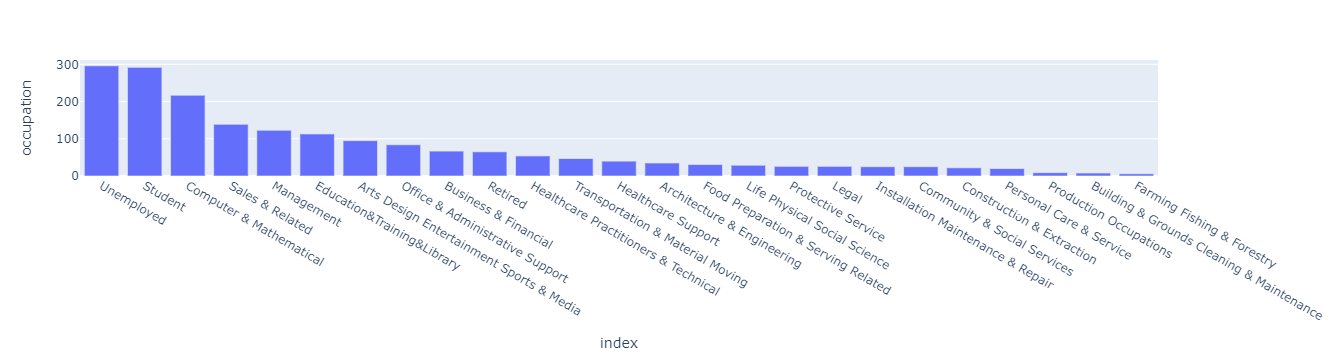

In [76]:
px.bar(CoffeeHse_accepted['occupation'].value_counts().sort_values(ascending=False), y='occupation')

#### Majority of the customers who have accepted Coffee House coupons were either unemployed or a student. Much of the stress and free time of the unemployed is taken out on coffee while students drink coffee to stay up late and study.

In [63]:
# Percent acceptance of Coffee House coupons
pct_CH_acceptance = CoffeeHse_accepted.shape[0] / CoffeeHse.shape[0]
pct_CH_acceptance

0.49633123689727465

#### Acceptance rate of CoffeeHouse coupons is 50%

In [78]:
# Examine the number of times the customer visited Coffee House
CoffeeHse_accepted['CoffeeHouse'].value_counts()

1~3      660
less1    506
4~8      346
gt8      225
never    157
Name: CoffeeHouse, dtype: int64

In [79]:
# The number of passengers who go to Coffee House less than or equal to 3 times per month 
groups_CHlt3x = ['1~3', 'less1', 'never']

CH_lt3x_total = CoffeeHse_accepted.query('CoffeeHouse in @groups_CHlt3x')
CH_lt3x_total

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
69,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
70,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
81,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,41,Divorced,...,less1,less1,1~3,4~8,1,0,0,1,0,1
12565,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Married partner,...,less1,1~3,1~3,never,1,0,0,1,0,1
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1


In [80]:
pct_CH_lt3x = CH_lt3x_total.shape[0] / CoffeeHse_accepted.shape[0]
pct_CH_lt3x

0.6985216473072862

#### Acceptance rate of customers who  will go to Coffee House less than or equal to 3 times per month is 70%

In [81]:
# Examine categories of marital status
CoffeeHse_accepted['maritalStatus'].value_counts()

Single               770
Married partner      720
Unmarried partner    318
Divorced              74
Widowed               12
Name: maritalStatus, dtype: int64

In [82]:
# The number of customers who are not married and goes to Coffee House less than 3x
not_married = ['Single', 'Unmarried partner', 'Divorced', 'Widowed']
CH_lt3x_notmarr = CH_lt3x_total.query('maritalStatus in @not_married')
CH_lt3x_notmarr                         

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
92,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
93,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
94,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,41,Divorced,...,less1,less1,1~3,4~8,1,0,0,1,0,1
12476,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,41,Divorced,...,less1,less1,1~3,4~8,1,0,0,1,0,1
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1


In [83]:
CH_lt3x_notmarr.shape[0] / CoffeeHse_accepted.shape[0]

0.426610348468849

In [84]:
# Look at income of not married and less frequent visitors to CH
CH_lt3x_notmarr['income'].value_counts()

$12500 - $24999     172
$25000 - $37499     164
$37500 - $49999     134
Less than $12500     93
$50000 - $62499      90
$100000 or More      65
$62500 - $74999      38
$87500 - $99999      36
$75000 - $87499      16
Name: income, dtype: int64

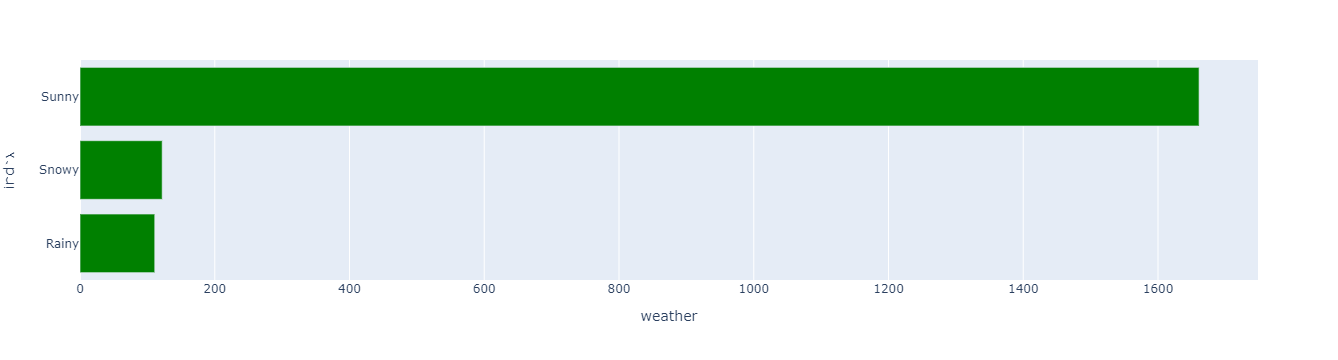

In [85]:
# Shows the type of weather when customers have accepted coupons for coffee house. They are accepted mostly when it is sunny
px.bar(CoffeeHse_accepted['weather'].value_counts().sort_values(), x='weather', color_discrete_sequence=['green'])

In [87]:
# The number of customers who goes to CH less frequently and are married
groups_CHlt3x = ['1~3', 'less1', 'never']
marr = ['Married partner']

CHlt3x_marr = CoffeeHse_accepted.query('CoffeeHouse in @groups_CHlt3x and maritalStatus in @marr')
CHlt3x_marr

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
69,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
70,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
81,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
133,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Married partner,...,less1,gt8,4~8,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12258,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,50plus,Married partner,...,1~3,4~8,1~3,1~3,1,0,0,1,0,1
12345,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,1~3,1~3,1~3,1,0,0,1,0,1
12429,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,31,Married partner,...,less1,4~8,1~3,4~8,1,0,0,1,0,1
12455,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Married partner,...,less1,1~3,1~3,1~3,1,0,0,1,0,1


In [88]:
CHlt3x_marr.shape[0] / CoffeeHse_accepted.shape[0]

0.2719112988384372

In [89]:
# Look at the income distribution of married group & less frequent visit
CHlt3x_marr['income'].value_counts()

$100000 or More     114
$50000 - $62499     103
$37500 - $49999      84
$87500 - $99999      53
$25000 - $37499      45
$12500 - $24999      43
$62500 - $74999      41
$75000 - $87499      31
Less than $12500      1
Name: income, dtype: int64

In [90]:
# the number of customers who accept Coffee House coupon, goes to Coffee House more than 3x and not married
groups_CHgt3 = ['4~8', 'gt8']
not_married = ['Single', 'Unmarried partner', 'Divorced', 'Widowed']

CH_gt3x_ntmarr = CoffeeHse_accepted.query('CoffeeHouse in @groups_CHgt3 and maritalStatus in @not_married')
CH_gt3x_ntmarr

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
54,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
56,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,0,0,1,0,1
12279,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,gt8,4~8,4~8,4~8,1,0,0,1,0,1
12366,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1


In [91]:
CH_gt3x_ntmarr.shape[0] / CoffeeHse_accepted.shape[0]

0.1932418162618796

In [92]:
# Who are they usually with? 
CH_gt3x_ntmarr['passanger'].value_counts()

Alone        217
Friend(s)    129
Partner       15
Kid(s)         5
Name: passanger, dtype: int64

In [93]:
# total number of customers who go to CoffeeHouse more than 3 times and are married
groups_CHgt3 = ['4~8', 'gt8']
married = ['Married partner']

CH_gt3x_marr = CoffeeHse_accepted.query('CoffeeHouse in @groups_CHgt3 and maritalStatus in @married')
CH_gt3x_marr

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
612,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,0,0,0,1,1
614,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,1,0,0,1,1
615,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,1,0,0,1,1
626,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,0,0,0,1,1
627,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1
10741,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1
10743,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1
11566,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1


In [94]:
CH_gt3x_marr.shape[0] / CoffeeHse_accepted.shape[0]

0.10823653643083421

In [95]:
# Customers who accepted CH coupons by gender
CH_bygender = CoffeeHse_accepted['gender'].value_counts()
CH_bygender

Female    967
Male      927
Name: gender, dtype: int64

In [96]:
# The number of female customers who have accepted CH coupon with friend passenger
CH_fem_friends = CoffeeHse_accepted[(CoffeeHse_accepted['gender'] == 'Female') & (CoffeeHse_accepted['passanger'] == 'Friend(s)')]
CH_fem_friends

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
133,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Married partner,...,less1,gt8,4~8,never,1,0,0,0,1,1
135,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,26,Married partner,...,less1,gt8,4~8,never,1,1,0,0,1,1
136,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Married partner,...,less1,gt8,4~8,never,1,1,0,0,1,1
177,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
180,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,50plus,Married partner,...,4~8,1~3,4~8,1~3,1,1,0,0,1,1
10570,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,31,Married partner,...,4~8,4~8,gt8,1~3,1,1,0,0,1,1
10599,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,31,Divorced,...,less1,4~8,gt8,gt8,1,1,0,0,1,1
10724,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,1


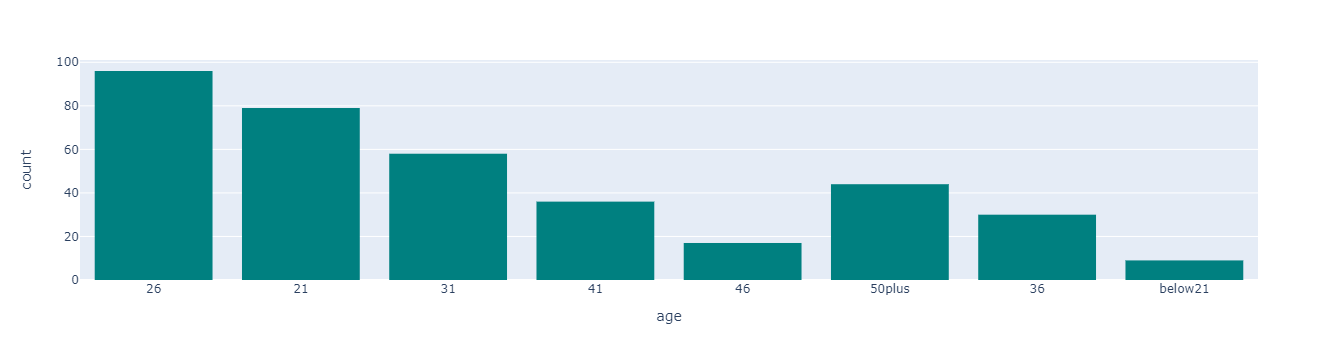

In [97]:
# Visual for ages of the female customers who accepted Coffee House coupons with friend passenger
px.histogram(CH_fem_friends['age'], x='age', color_discrete_sequence=['teal'])

In [98]:
CH_fem_friends.shape[0] / CoffeeHse_accepted.shape[0]

0.19482576557550157

In [99]:
CH_fem_friends['CoffeeHouse'].value_counts()

1~3      147
less1    103
4~8       59
gt8       37
never     23
Name: CoffeeHouse, dtype: int64

In [100]:
# check the age with majority of females who accepted CH coupons with friends
CH_fem_friends['age'].value_counts()

26         96
21         79
31         58
50plus     44
41         36
36         30
46         17
below21     9
Name: age, dtype: int64

In [101]:
# the number of male customers who accepted CH coupons with friend passengers
CH_male_friends = CoffeeHse_accepted[(CoffeeHse_accepted['gender'] == 'Male') & (CoffeeHse_accepted['passanger'] == 'Friend(s)')]
CH_male_friends

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
54,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,21,Single,...,4~8,less1,never,never,1,1,0,0,1,1
10488,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,below21,Single,...,1~3,1~3,less1,less1,1,1,0,0,1,1
10549,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Single,...,1~3,1~3,4~8,4~8,1,1,0,0,1,1
10621,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,21,Single,...,never,gt8,less1,less1,1,1,0,0,1,1


In [102]:
CH_male_friends.shape[0] / CoffeeHse_accepted.shape[0]

0.17581837381203802

In [103]:
# check the age with majority of males who accepted CH coupons with friends
CH_male_friends['age'].value_counts()

21         91
26         69
31         37
50plus     32
46         27
41         27
36         27
below21    23
Name: age, dtype: int64